In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance



In [40]:
# Lees de CSV-bestand in (vervang 'data.csv' met de juiste pad naar je bestand)
df = pd.read_csv('cleaned_and_featured_data.csv', sep=';')

# Verken de data (optioneel)
print(df.head())
print(df.info())

# Selecteer de features (X) en de target variabele (y)
# X = df.drop(['HeartDisease', 'CaseNumber', 'LastName', 'PostCode'], axis=1)
X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

# Converteer categorische kolommen naar numeriek (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)


   Age  Male ChestPainType  RestingBP Cholesterol  FastingBS  RestingECG  \
0   46     1           ASY        100           H          1           1   
1   56     1           NAP        125           H          1           0   
2   42     1           ASY        105           H          1           0   
3   38     1           NAP        100           H          0           0   
4   56     1           ASY        115           H          1           1   

   MaxHR  ExerciseAngina _ True  Oldpeak ST_Slope  HeartDisease  
0    133                      0       26     Flat             1  
1     98                      0       20     Flat             1  
2    128                      1       15     Down             1  
3    179                      0       11       Up             0  
4     82                      0       10       Up             1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 12 columns):
 #   Column                 Non-Null Count

In [41]:
# Splits de data in een train- en testset (80% trainen, 20% testen)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
# Kies het Gradient Boosting model
model = GradientBoostingClassifier()

# Train het model
model.fit(X_train, y_train)


GradientBoostingClassifier()

In [43]:
# Voorspel met de testdata
y_pred = model.predict(X_test)  # Voorspel met de testdata
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Krijg de voorspelde waarschijnlijkheden

# Bereken de evaluatie metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
f1 = f1_score(y_test, y_pred)

# Print de evaluatie metrics
print(f"Gradient Boosting - Accuracy: {accuracy:.4f}, ROC AUC: {roc_auc:.4f}, F1 Score: {f1:.4f}")


Gradient Boosting - Accuracy: 0.8962, ROC AUC: 0.9421, F1 Score: 0.9091


In [44]:
# Maak een DataFrame met de werkelijke en voorspelde waarden
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Predicted Probability': y_pred_proba
})

# Selecteer een willekeurige sample van 20 rijen
random_sample = results_df.sample(n=20, random_state=42)

# Print de willekeurige sample
print(random_sample)


     Actual  Predicted  Predicted Probability
72        0          0               0.013906
218       0          0               0.046428
731       0          1               0.741746
660       1          1               0.820756
518       1          1               0.961705
39        1          1               0.977353
70        0          0               0.036315
755       1          1               0.982349
559       1          1               0.926792
394       0          0               0.028012
136       0          0               0.085475
433       0          0               0.219918
888       1          1               0.948078
408       0          1               0.536501
911       1          1               0.968250
235       0          0               0.026967
578       1          1               0.560621
501       1          1               0.928421
209       0          0               0.038657
467       0          0               0.052418


# Confusion Matrix

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           69           10
Actual 1            9           95


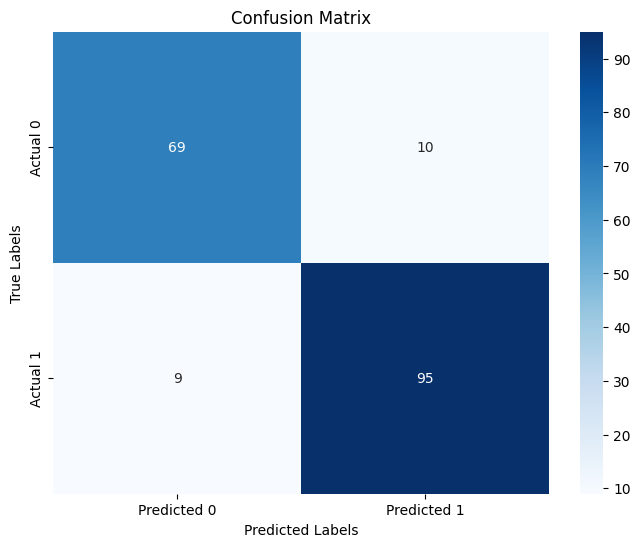

              precision    recall  f1-score   support

           0       0.88      0.87      0.88        79
           1       0.90      0.91      0.91       104

    accuracy                           0.90       183
   macro avg       0.89      0.89      0.89       183
weighted avg       0.90      0.90      0.90       183



In [45]:
# Bereken de confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Zet de confusion matrix om in een DataFrame
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Print de confusion matrix
print("Confusion Matrix:")
print(cm_df)

# Visualiseer de confusion matrix met Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# print classification report
print(classification_report(y_test, y_pred))

In [46]:
from sklearn.model_selection import GridSearchCV

# Definieer de hyperparameters en de waarden die je wilt testen
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
}

# Configureer de GridSearchCV
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(), 
                           param_grid=param_grid, 
                           scoring='roc_auc', 
                           cv=5, 
                           verbose=2)

# Voer de Grid Search uit
grid_search.fit(X_train, y_train)

# Toon de beste hyperparameters
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Train het model met de beste hyperparameters
best_model = grid_search.best_estimator_


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END learning_rate=0.01, max_depth

In [47]:
# Maak voorspellingen met het beste model
y_pred_best = best_model.predict(X_test)
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

# Maak een DataFrame met de werkelijke en voorspelde waarden
results_df_best = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_best,
    'Predicted Probability': y_pred_proba_best
})

# Selecteer een willekeurige sample van 20 rijen
random_sample_best = results_df_best.sample(n=20, random_state=42)

# Print de willekeurige sample
print(random_sample_best)


     Actual  Predicted  Predicted Probability
72        0          0               0.013906
218       0          0               0.046428
731       0          1               0.741746
660       1          1               0.820756
518       1          1               0.961705
39        1          1               0.977353
70        0          0               0.036315
755       1          1               0.982349
559       1          1               0.926792
394       0          0               0.028012
136       0          0               0.085475
433       0          0               0.219918
888       1          1               0.948078
408       0          1               0.536501
911       1          1               0.968250
235       0          0               0.026967
578       1          1               0.560621
501       1          1               0.928421
209       0          0               0.038657
467       0          0               0.052418


# Confusion Matrix

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           69           10
Actual 1           10           94


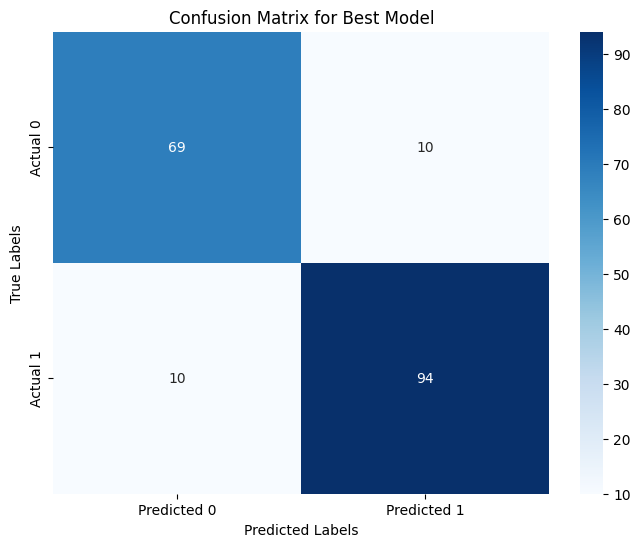

              precision    recall  f1-score   support

           0       0.88      0.87      0.88        79
           1       0.90      0.91      0.91       104

    accuracy                           0.90       183
   macro avg       0.89      0.89      0.89       183
weighted avg       0.90      0.90      0.90       183



In [48]:
# Bereken de confusion matrix
cm_best = confusion_matrix(y_test, y_pred_best)

# Zet de confusion matrix om in een DataFrame
cm_df_best = pd.DataFrame(cm_best, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Print de confusion matrix
print("Confusion Matrix:")
print(cm_df_best)

# Visualiseer de confusion matrix met Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df_best, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Best Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# print classification report
print(classification_report(y_test, y_pred))


Permutation Importance:
                       Importance
ST_Slope_Up              0.050091
Oldpeak                  0.046084
Male                     0.041166
MaxHR                    0.030055
ExerciseAngina _ True    0.020401
FastingBS                0.020219
ChestPainType_NAP        0.018215
RestingBP                0.015483
ChestPainType_ATA        0.012386
Cholesterol_M            0.009107
ST_Slope_Flat            0.008379
ChestPainType_TA         0.002186
RestingECG               0.002004
Age                     -0.002004
Cholesterol_L           -0.006740


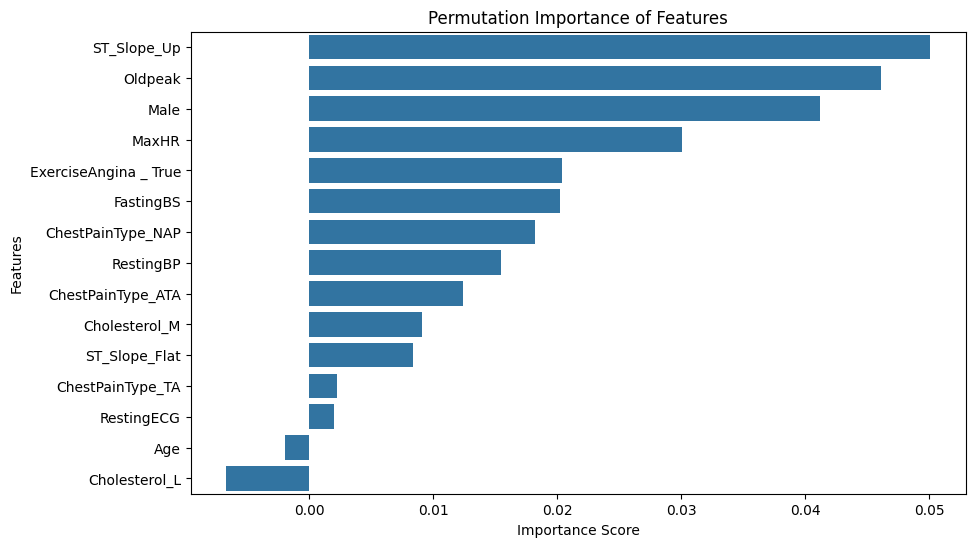

In [49]:
# Stap 9: Permutation Importance
result = permutation_importance(best_model, X_test, y_test, n_repeats=30, random_state=42)

# Zet de resultaten om in een DataFrame
importance_df = pd.DataFrame(result.importances_mean, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

# Print de permutation importance
print("Permutation Importance:")
print(importance_df)

# Visualiseer de permutation importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importance_df['Importance'], y=importance_df.index)
plt.title('Permutation Importance of Features')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

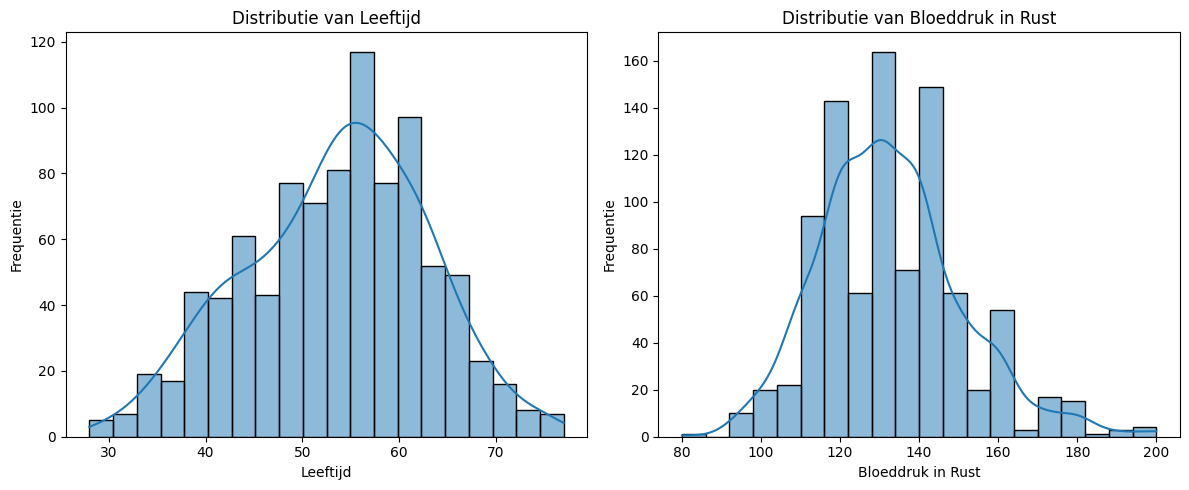

In [50]:
# Visualiseer de distributie van 'Age'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distributie van Leeftijd')
plt.xlabel('Leeftijd')
plt.ylabel('Frequentie')

# Visualiseer de distributie van 'RestingBP'
plt.subplot(1, 2, 2)
sns.histplot(df['RestingBP'], bins=20, kde=True)
plt.title('Distributie van Bloeddruk in Rust')
plt.xlabel('Bloeddruk in Rust')
plt.ylabel('Frequentie')

plt.tight_layout()
plt.show()


# Drempelaanpassing

Classification Report na Drempelaanpassing:
              precision    recall  f1-score   support

           0       1.00      0.47      0.64        79
           1       0.71      1.00      0.83       104

    accuracy                           0.77       183
   macro avg       0.86      0.73      0.73       183
weighted avg       0.84      0.77      0.75       183

Willekeurige Sample van 10 Rijen na Drempelaanpassing:
     Actual  Predicted  Predicted Probability
72        0          0               0.013906
218       0          0               0.046428
731       0          1               0.741746
660       1          1               0.820756
518       1          1               0.961705
39        1          1               0.977353
70        0          0               0.036315
755       1          1               0.982349
559       1          1               0.926792
394       0          0               0.028012
Confusion Matrix na Drempelaanpassing:
          Predicted 0  Predic

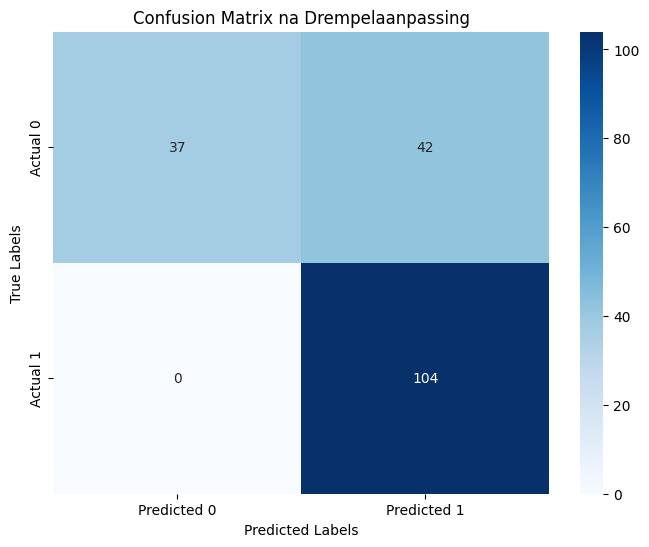

In [57]:
# Voorspellingen maken
y_pred_proba_best = best_model.predict_proba(X_test)[:, 1]

# Pas de drempel aan (bijv. naar 0.3)
threshold = 0.07
y_pred_adjusted = (y_pred_proba_best >= threshold).astype(int)

# Evalueer de resultaten met de aangepaste drempel
print("Classification Report na Drempelaanpassing:")
print(classification_report(y_test, y_pred_adjusted))

# Maak een DataFrame met de werkelijke en voorspelde waarden
results_df_adjusted = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_adjusted,
    'Predicted Probability': y_pred_proba_best
})

# Selecteer een willekeurige sample van 10 rijen
random_sample_adjusted = results_df_adjusted.sample(n=10, random_state=42)

# Print de willekeurige sample
print("Willekeurige Sample van 10 Rijen na Drempelaanpassing:")
print(random_sample_adjusted)

# Bereken de confusion matrix
cm_adjusted = confusion_matrix(y_test, y_pred_adjusted)

# Zet de confusion matrix om in een DataFrame
cm_df_adjusted = pd.DataFrame(cm_adjusted, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Print de confusion matrix voor het aangepaste model
print("Confusion Matrix na Drempelaanpassing:")
print(cm_df_adjusted)

# Visualiseer de confusion matrix voor het aangepaste model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df_adjusted, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix na Drempelaanpassing')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
